Данная статья является одной из самых цитируемых статей в области машинного обучения. В ней представлена сверточная архитектура AlexNet, успешно решающая задачу классификации изображений, и программный код для ее обучения.

### Более ранние работы

Конечно, сверточные сети (CNN) были известны задолго до изобретения AlexNet. Двумя наиболее известными ранними работами в области CNN были [неокогнитрон]($Neocognitron: A Self-organizing Neural Network Model for a Mechanism of Pattern Recognition Unaffected by Shift in Position$) Кунихико Фукусимы (1980) и [LeNet]($Gradient-Based Learning Applied to Document Recognition$) (Ян Лекун, Йошуа Бенжио, Леон Ботту, Патрик Хаффнер, 1998) для классификации рукописных цифр датасета MNIST.

В LeNet-5 использовалось 2 сверточных слоя. После каждого сверточного слоя ставился average-pooling слой, после которого выполнялось обучаемое масштабирование и смещение $y = w_1*x + w_2$. Далее ставились 2 скрытых полносвязных слоя и выходной слой, основанный на радиально-базисных функциях.

В последующих работах были опробованы многочисленные модификации и улучшения архитектуры CNN, такие как max-pooling. Для ускорения обучения были применены вычисления на GPU с помощью CUDA ([R. Uetz et al., 2009](https://ieeexplore.ieee.org/document/5357786)). Стоит упомянуть вышедшую за полгода до AlexNet [статью]($Multi-column Deep Neural Networks for Image Classification$), в которой описывалась сеть MCDNN (DanNet), побившая рекорды точности сразу на нескольких бенчмарках. Эта сеть была выстроена как ансамль из сверточных сетей, которые принимали на вход одно и то же изображение с разным вариантами предобработки, что похоже на TTA (test-time augmentations).

### Архитектура AlexNet

Сеть AlexNet состоит из следующей последовательности слоев:
- Свертка 11x11 и шагом 4 пикселя
- Свертка 5x5
- Max pooling c размером окна 3 и шагом 2
- Свертка 3x3
- Max pooling c размером окна 3 и шагом 2
- Свертка 3x3
- Свертка 3x3
- Свертка 3x3
- Max pooling c размером окна 3 и шагом 2
- Reshape в вектор (flatten)
- Полносвязный слой размером 4096
- Полносвязный слой размером 4096
- Полносвязный выходной слой размером 10

По сравнению с предыдущими сверточными архитектурами сеть AlexNet имела два важных отличия:

1. **ReLU**. Использование функции активации ReLU вместо популярной в то время tanh. Функция ReLU была впервые описана в работе "[Rectified Linear Units Improve Restricted Boltzmann Machines]($Rectified Linear Units Improve Restricted Boltzmann Machines$)" (Nair, Hinton, 2010).

2. **Dropout** после двух скрытых полносвязных слоев. Механизм dropout позволяет уменьшить переобучение и был впервые описан в статье "[Improving neural networks by preventing co-adaptation of feature detectors]($Improving neural networks by preventing co-adaptation of feature detectors$)" (Hinton, Srivastava, Krizhevsky, Sutskever, Salakhutdinov, 2012).

Были и еще два менее существенных отличия:

3. **Мax pooling с перекрытием**: c размером окна 3 и шагом 2.

4. **Local Response Normalization**. Опишем принцип работы данного механизма. На выходе сверточного слоя с функцией активации ReLU мы получаем четырехмерный массив чисел. Зафиксируем номер изображения в батче, координаты по $X$ и по $Y$ и получим вектор $V$ из положительных чисел, в котором номер элемента соответствует номеру фильтра. Элемент вектора $V_i$ умножается на коэффициент, который тем меньше, чем больше сумма элементов $V_{i-2} + V_{i-1} + V_i + V_{i+1} + V_{i+2}$ (формулу см. в статье). Таким образом, соседние элементы вектора в некоторой степени "гасят" друг друга, наподобие того как в игре "жизнь" клетка "умирает" от перенаселения. Однако здесь это влияение совсем небольшое за счет выбранного авторами коэффициента $\alpha=10^{-4}$. Можно считать, что при таком коэффициенте соотношение активаций в векторе $V$ практически не изменяется. Механизм Local Response Normalization не получил распространения после статьи AlexNet.

Интересна особенность инициализации весов: bias'ы сверточных слоев 2, 4 и 6, а также полносвязных слоев, были инициализированы единицами:

> We initialized the weights in each layer from a zero-mean Gaussian distribution with standard deviation 0.01. We initialized the neuron biases in the second, fourth, and fifth convolutional layers,
as well as in the fully-connected hidden layers, with the constant 1. This initialization accelerates
the early stages of learning by providing the ReLUs with positive inputs. We initialized the neuron
biases in the remaining layers with the constant 0.

На вход сеть принимала изображения размером 224х224. Это первая сеть, которая использовала такие большие изображения: это стало возможным благодаря новым видеокартам и распараллеливанию обучения на две видеокарты. После выхода статьи такой размер изображения стал стандартным в компьютерном зрении.

Таким образом, авторы статьи AlexNet не придумали ничего принципиально нового, но сумели объединить в одной архитектуре несколько эффективных техник, открытых незадолго до этого.

### Победа в соревновании ILSVRC

Сеть AlexNet с большим отрывом заняла первое место в ежегодном соревновании по классификации изображений ILSVRC (ImageNet Large-Scale Visual Recognition Challenge).

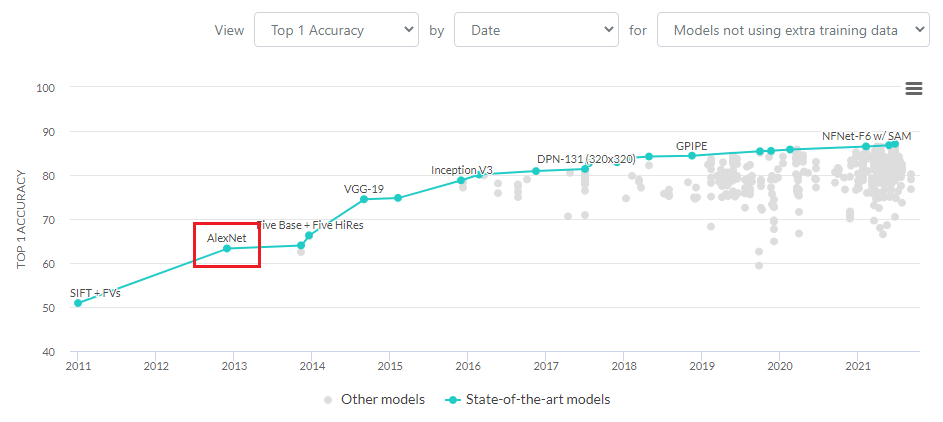

[Источник изображения](https://paperswithcode.com/sota/image-classification-on-imagenet)

Это стало возможным благодаря написанию эффективной программной реализации алгоритма обучения нейросетей. *Эффективная реализация свертки и распараллеливание вычислений по двум видеокартам* позволило использовать больший размер изображения и ускорить процесс обучения. Авторы сделали программный код [публично доступным](https://code.google.com/archive/p/cuda-convnet/), что ускорило дальнейший прогресс в области сверточных сетей.